**Import Libraries:**

In [ ]:
#standard libraries
import torch
from torch import nn
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
#biblioteca para o dataloader
from torch.utils.data import Dataset, DataLoader
#necessário para colocar o caminho para leitura do dataset
import os
import plotly
import plotly.express as px
import plotly.graph_objects as go

**Coleta dos dados do *dataset*:**

In [ ]:
#Para conectar Google Drive com o codigo no Colab e configurar isso:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##print the tabel
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alinhada2_dir.csv")
tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alinhada2_esq.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_dir_imuesq.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_dir_imudir.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_esq_imuesq.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_esq_imudir.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3dir_imuesq.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3esq_imuesq.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3dir_imudir.csv")
# tabela = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3esq_imudir.csv")
# display(tabela)

In [ ]:
##print the tabel
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alinhada2_dir.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alinhada2_esq.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_dir_imuesq.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_dir_imudir.csv")
tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_esq_imuesq.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desvio_esq_imudir.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3dir_imuesq.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3esq_imuesq.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3dir_imudir.csv")
# tabela2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/elevado_rolo3esq_imudir.csv")
# display(tabela2)

**Plot dos gráficos:**

In [ ]:
g = 9.81 #aceleração da gravidade
T = tabela["Time (s)"]
#print(T)

##seleciona quais dados da tabela serão analisados
Xgyro = tabela["Gyroscope X (deg/s)"]
Ygyro = tabela["Gyroscope Y (deg/s)"]
Zgyro = tabela["Gyroscope Z (deg/s)"]

Xacc = g*tabela["Accelerometer X (g)"]
Yacc = g*tabela["Accelerometer Y (g)"]
Zacc = g*tabela["Accelerometer Z (g)"]

In [ ]:
g = 9.81 #aceleração da gravidade
T2 = tabela2["Time (s)"]
#print(T)

##seleciona quais dados da tabela serão analisados
Xgyro2 = tabela2["Gyroscope X (deg/s)"]
Ygyro2 = tabela2["Gyroscope Y (deg/s)"]
Zgyro2 = tabela2["Gyroscope Z (deg/s)"]

Xacc2 = g*tabela2["Accelerometer X (g)"]
Yacc2 = g*tabela2["Accelerometer Y (g)"]
Zacc2 = g*tabela2["Accelerometer Z (g)"]

**Filtros:**

In [ ]:
##Média móvel
mean_Zacc = Zacc.rolling(window=5).mean()
##Savitzky-Golay
sv_filter = scipy.signal.savgol_filter(x=Zacc, window_length=5, polyorder=1)
##Mediana móvel
median_Zacc = Zacc.rolling(window=10).median()
median_Zacc2 = Zacc2.rolling(window=10).median()

**Intervalo de tempo definido (delta):**

In [ ]:
delta = round((T[5]-T[4]),6)
delta2 = round((T2[5]-T2[4]),6)
# print(delta)
# print(delta2)

**Correia alinhada - Acc_Z**

**Time domain analysis**

In [ ]:
#correia alinhada

# i = median_Zacc.items()
# # print(f)
# ##cria FFT
# f=[]
# for j in i:
#   f.append(j[1])

# f = pd.DataFrame(f, columns=[' '])
# # print(f)

f = Zacc
# print(f)
n=len(f)
print(f)
yf = np.fft.fft(f, n)
# print(yf)
psd = yf * np.conj(yf) / n
freq = (1/(delta*n)) * np.arange(n)
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)
psd_real = np.abs(psd[idxs_half]) #amplitude for first half
## Filter out noise
threshold = 500 #1e4
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * yf #used to retrieve the signal
ffilt = np.fft.ifft(fhat_clean)

######correia desalinhada

f2 = Zacc2
##cria FFT
n2=len(f2)
yf2 = np.fft.fft(f2, n2)
# print(yf2)
psd2 = yf2 * np.conj(yf2) / n2
freq2 = (1/(delta2*n2)) * np.arange(n2)
idxs_half2 = np.arange(1, np.floor(n2/2), dtype=np.int32)
psd_real2 = np.abs(psd2[idxs_half2]) #amplitude for first half

## Filter out noise
threshold2 = 500 #1e4
psd_idxs2 = psd2 > threshold2 #array of 0 and 1
psd_clean2 = psd2 * psd_idxs2 #zero out all the unnecessary powers
fhat_clean2 = psd_idxs2 * yf2 #used to retrieve the signal
ffilt2 = np.fft.ifft(fhat_clean2)

# ######correia desalinhada

# #Plot: Time domain
# plt.figure(figsize=(16,6))

# # plt.plot(T, f, color="y", lw="2", label="Acc")
# # plt.plot(T, mean_Zacc, color='k', lw=1, label='Acc media movel')

# # plt.plot(T, np.abs(median_Zacc), color='r', lw=1, label='Referência')
# # plt.plot(T2, np.abs(median_Zacc2), color='b', lw=2, label='Problema')

# # plt.plot(T, np.abs(median_Zacc), color='r', lw=1, label='IMU Esquerda')
# # plt.plot(T2, np.abs(median_Zacc2), color='b', lw=2, label='IMU Direta')

# # plt.plot(T, median_Zacc, color='r', lw=1, label='Referência')
# # plt.plot(T2, median_Zacc2, color='b', lw=2, label='Problema')

# plt.plot(T, median_Zacc, color='r', lw=1, label='IMU esquerda')
# plt.plot(T2, median_Zacc2, color='b', lw=2, label='IMU direita')

# # plt.plot(T, sv_filter, color='k', lw=1,label='Acc Savitzky-Golay' )
# # plt.plot(T, ffilt, color='k', lw=1, label='Acc_filtered_FFT')

# plt.legend(loc='best', shadow=True, framealpha=1)
# plt.title("Linear acceleration (ACC) vs Time - Axis Z")
# plt.xlabel("Time (s)")
# plt.ylabel("Acc (m/s²)")
# plt.show()

# #Area sob a curva
# area_alin = scipy.integrate.trapezoid(abs(fhat_clean)[freq>0],freq[freq>0],0.001, axis=-1)
# print(f"P/ a correia alinhada, o valor da densidade espectral é: {area_alin}")


0        9.706363
1        9.673553
2        9.673453
3        9.654703
4        9.645333
          ...    
1485   -22.365299
1486   -19.049931
1487   -57.747997
1488   -49.796011
1489   -56.830517
Name: Accelerometer Z (g), Length: 1490, dtype: float64


**Correia alinhada - Acc_Z**

**Frequency domain analysis**

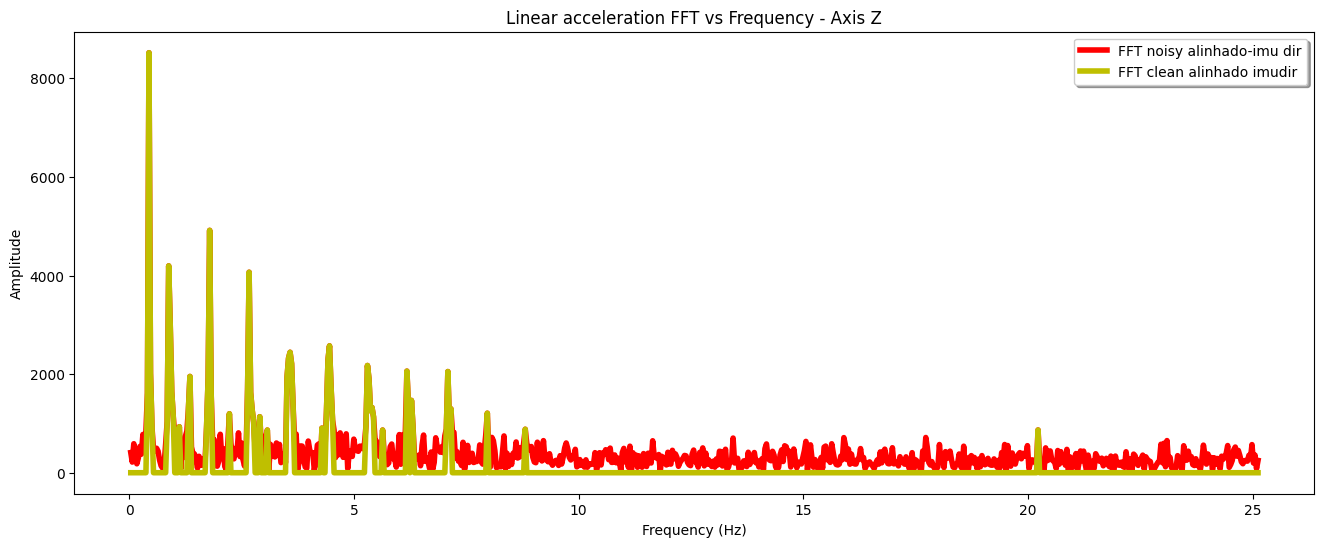

In [ ]:
##Plot: FFT
plt.figure(figsize=(16,6))

#####   IMPORTANTE: UTILIZA-SE A PSD PARA CORTAR OS PICOS NO FILTRO, NÃO A FFT.POR ISSO HÁ AS DUAS LINHAS DE CÓDIGO ABAIXO COMENTADAS
#####   PARA AJUSTAR O FILTRO, BASTA:
##### - DESCOMENTAR ESSAS DUAS LINHAS E COMENTAR AS OUTRAS Q VEM EM SEGUIDA: "FFT NOISY" E "FFT CLEAN"
##### - RODAR A CÉLULA NOVAMENTE E VER O NOVO GRÁFICO DA PSD PARA ESCOLHER OS PICOS A SEREM CORTADOS
##### - DPS DE ESCOLHER A AMPLITUDE DE INTERESSE, BASTA MUDAR O VALOR DA VARIÁVEL threshold NA CÉLULA ANTERIOR, ONDE CALCULA-SE PSD E FFT

# plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), color='r', lw=3, label='PSD noisy')
# plt.plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='b', lw=2, label='PSD clean (filtered)')

plt.plot(freq[idxs_half], np.abs(yf[idxs_half]), color='r', lw=4, label='FFT noisy alinhado-imu dir')
plt.plot(freq[idxs_half], np.abs(fhat_clean[idxs_half]), color='y', lw=4, label='FFT clean alinhado imudir')

# plt.plot(freq2[idxs_half2], np.abs(yf2[idxs_half2]), color='b', lw=2, label='FFT noisy desvio dir-imu dir')
# plt.plot(freq2[idxs_half], np.abs(fhat_clean2[idxs_half]), color='k', lw=2, label='FFT noisy desvio dir-imudir')


# plt.ylim([0, 1e4])
plt.title("Linear acceleration FFT vs Frequency - Axis Z")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(loc='best', shadow=True, framealpha=1)
plt.show()

In [ ]:
#Area sob a curva
area_alin = scipy.integrate.trapezoid(np.abs(fhat_clean[idxs_half]),freq[idxs_half],0.001, axis=-1)
area_desalin = scipy.integrate.trapezoid(np.abs(fhat_clean2[idxs_half2]),freq2[idxs_half2],0.001, axis=-1)
print(f"P/ a correia alinhada, o valor da densidade espectral é: {round(area_alin,4)}")
print(f"P/ a correia desalinhada, o valor da densidade espectral é: {round(area_desalin,4)}")

P/ a correia alinhada, o valor da densidade espectral é: 3184.5069
P/ a correia desalinhada, o valor da densidade espectral é: 2800.5245


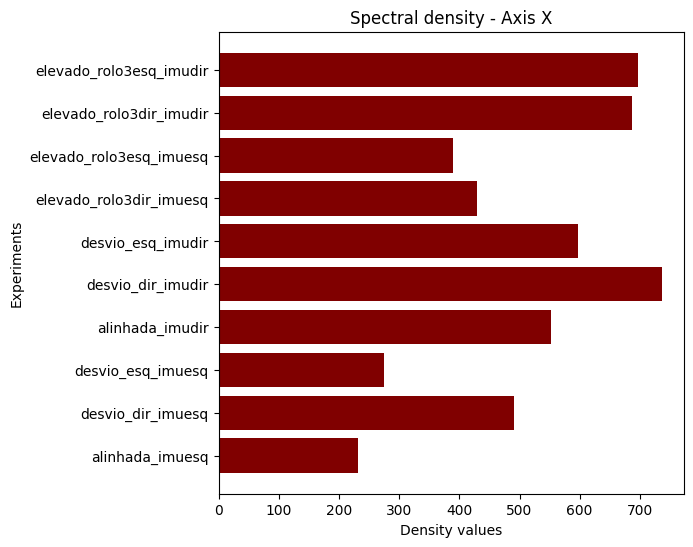

In [ ]:
plt.figure(figsize=(6,6))
x = ["alinhada_imuesq","desvio_dir_imuesq","desvio_esq_imuesq","alinhada_imudir","desvio_dir_imudir","desvio_esq_imudir", "elevado_rolo3dir_imuesq","elevado_rolo3esq_imuesq", "elevado_rolo3dir_imudir", "elevado_rolo3esq_imudir"]
y = [231, 491, 274, 552, 736, 597, 428.9358, 389.2054, 686.7252, 697.5588]
plt.barh(x, y, color ='maroon')
plt.title('Spectral density - Axis X')
plt.ylabel('Experiments')
plt.xlabel('Density values')
plt.show()

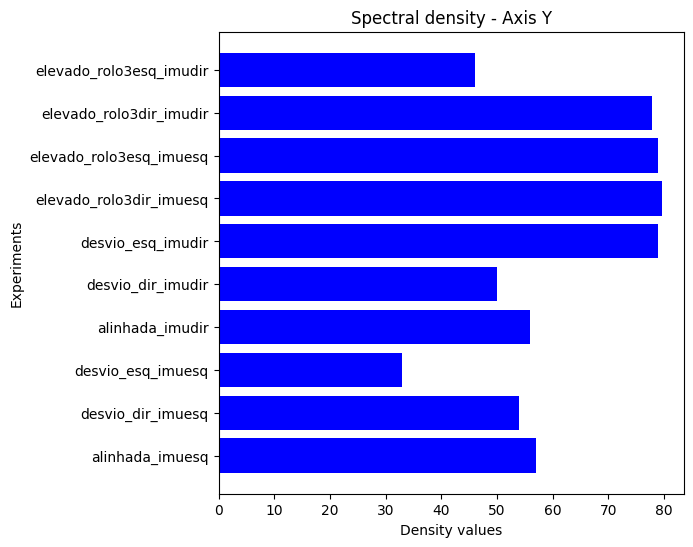

In [ ]:
plt.figure(figsize=(6,6))
x = ["alinhada_imuesq","desvio_dir_imuesq","desvio_esq_imuesq","alinhada_imudir","desvio_dir_imudir","desvio_esq_imudir", "elevado_rolo3dir_imuesq","elevado_rolo3esq_imuesq", "elevado_rolo3dir_imudir", "elevado_rolo3esq_imudir"]
y = [57,54,33,56,50,79, 79.5683, 78.9081, 77.9389,46.1347]
plt.barh(x, y, color ='b')
plt.title('Spectral density - Axis Y')
plt.ylabel('Experiments')
plt.xlabel('Density values')
plt.show()

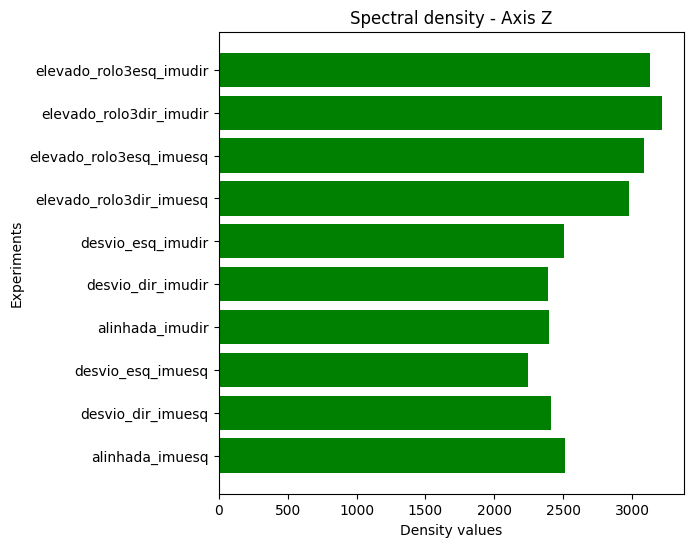

In [ ]:
plt.figure(figsize=(6,6))
x = ["alinhada_imuesq","desvio_dir_imuesq","desvio_esq_imuesq","alinhada_imudir","desvio_dir_imudir","desvio_esq_imudir", "elevado_rolo3dir_imuesq","elevado_rolo3esq_imuesq", "elevado_rolo3dir_imudir", "elevado_rolo3esq_imudir"]
y = [2511,2411,2246,2396,2392,2502, 2978.5955, 3084.5859, 3212.0476, 3125.1368]
plt.barh(x, y, color ='g')
plt.title('Spectral density - Axis Z')
plt.ylabel('Experiments')
plt.xlabel('Density values')
# plt.xlim([2000, 2500])
plt.show()

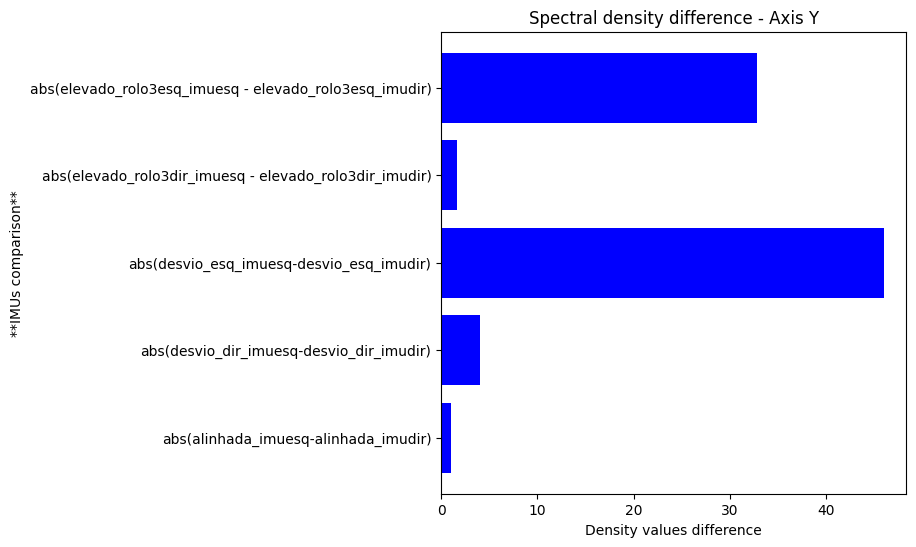

In [ ]:
plt.figure(figsize=(6,6))
x = ["abs(alinhada_imuesq-alinhada_imudir)","abs(desvio_dir_imuesq-desvio_dir_imudir)","abs(desvio_esq_imuesq-desvio_esq_imudir)", "abs(elevado_rolo3dir_imuesq - elevado_rolo3dir_imudir)", "abs(elevado_rolo3esq_imuesq - elevado_rolo3esq_imudir)"]
y = [1,4,46,1.6294, 32.7734]
plt.barh(x, y, color ='b')
plt.title('Spectral density difference - Axis Y')
plt.ylabel('**IMUs comparison**')
plt.xlabel('Density values difference')
# plt.xlim([2000, 2500])
plt.show()

**Correia Alinhada - Giroscópio Y**

**Time Domain Analysis**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


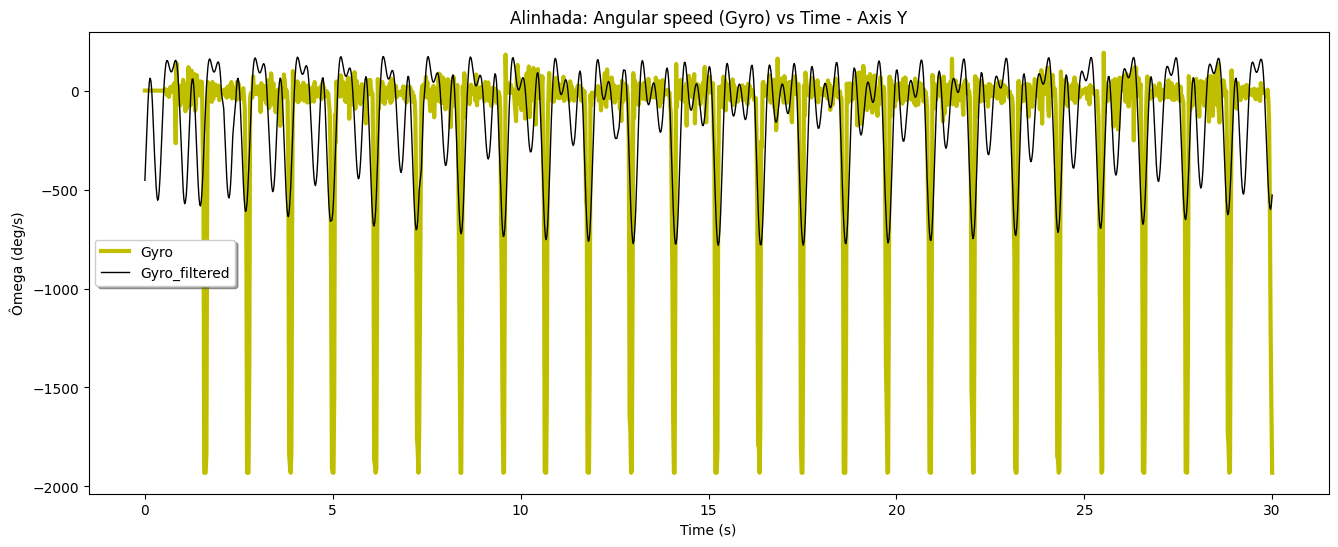

P/ a correia alinhada, o valor da densidade espectral é: 31933.44041188128


In [ ]:
#cria figura p/ o gráfico
#plt.figure(figsize=(16,6))

#correia alinhada
f = Ygyro
##cria FFT
n=len(f)
yf = np.fft.fft(f, n)
psd = yf * np.conj(yf) / n
freq = (1/(delta*n)) * np.arange(n)
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)
psd_real = np.abs(psd[idxs_half]) #amplitude for first half

## Filter out noise
threshold = 1e7
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * yf #used to retrieve the signal
ffilt = np.fft.ifft(fhat_clean)

#Plot: Time domain
plt.figure(figsize=(16,6))

plt.plot(T, f, color="y", lw="3", label="Gyro")
plt.plot(T, ffilt, color='k', lw=1, label='Gyro_filtered')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.title("Alinhada: Angular speed (Gyro) vs Time - Axis Y")
plt.xlabel("Time (s)")
plt.ylabel("Ômega (deg/s)")

plt.show()

#Area sob a curva
area_alin = scipy.integrate.trapezoid(abs(fhat_clean)[freq>0],freq[freq>0],0.001, axis=-1)
print(f"P/ a correia alinhada, o valor da densidade espectral é: {area_alin}")

**Correia alinhada - Giroscópio Y**

**Frequency domain analysis**

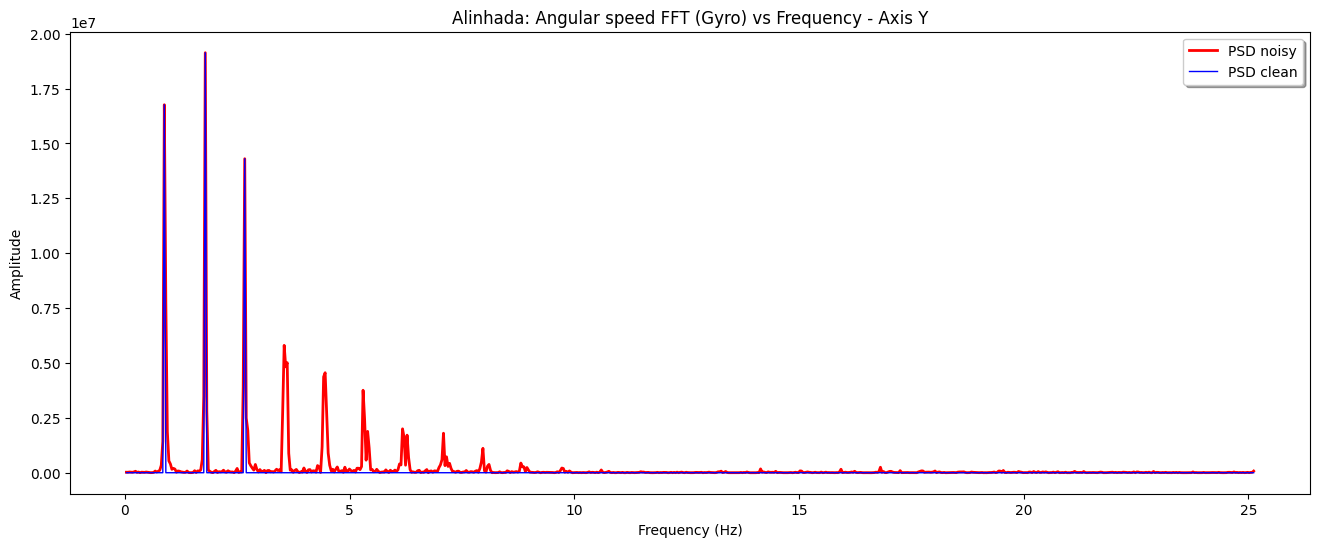

In [ ]:
#Plot: FFT
plt.figure(figsize=(16,6))


#####   IMPORTANTE: UTILIZA-SE A PSD PARA CORTAR OS PICOS NO FILTRO, NÃO A FFT.POR ISSO HÁ AS DUAS LINHAS DE CÓDIGO ABAIXO COMENTADAS
#####   PARA AJUSTAR O FILTRO, BASTA:
##### - DESCOMENTAR ESSAS DUAS LINHAS E COMENTAR AS OUTRAS Q VEM EM SEGUIDA: "FFT NOISY" E "FFT CLEAN"
##### - RODAR A CÉLULA NOVAMENTE E VER O NOVO GRÁFICO DA PSD PARA ESCOLHER OS PICOS A SEREM CORTADOS
##### - DPS DE ESCOLHER A AMPLITUDE DE INTERESSE, BASTA MUDAR O VALOR DA VARIÁVEL threshold NA CÉLULA ANTERIOR, ONDE CALCULA-SE PSD/FFT
##### - OBS: NESSE CASO OS VALORES DE PICO SÃO MAIS ALTOS Q NA ACC, POR ISSO USAMOS "e7"no threshold
plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), color='r', lw=2, label='PSD noisy')
plt.plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='b', lw=1, label='PSD clean')

# plt.plot(freq[idxs_half], np.abs(yf[idxs_half]), color='r', lw=3, label='FFT noisy')
# plt.plot(freq[idxs_half], np.abs(fhat_clean[idxs_half]), color='b', lw=2, label='FFT clean')
plt.title("Alinhada: Angular speed FFT (Gyro) vs Frequency - Axis Y")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(loc='best', shadow=True, framealpha=1)

plt.show()